In [105]:
!pip install keras -q
!pip install pydot -q
!brew install graphiz -q

==> Searching for similarly named formulae...
This similarly named formula was found:
graphviz
To install it, run:
  brew install graphviz
==> Searching for a previously deleted formula (in the last month)...
Error: No previously deleted formula found.
==> Searching taps on GitHub...
Error: No formulae found in taps.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from keras import datasets, layers, models, utils

In [13]:
!ls ./../data/pickle

df_bin_test.pkl  df_bin_train.pkl df_tri_test.pkl  df_tri_train.pkl


In [2]:
df_bin_train = pd.read_pickle('./../data/pickle/df_bin_train.pkl')
df_bin_test = pd.read_pickle('./../data/pickle/df_bin_test.pkl')
df_tri_train = pd.read_pickle('./../data/pickle/df_tri_train.pkl')
df_tri_test = pd.read_pickle('./../data/pickle/df_tri_test.pkl')

In [282]:
df_bin_train.isna().value_counts()

0      1    
False  False    10243
True   False        1
dtype: int64

In [3]:
df_bin_train.dropna(inplace=True)

In [4]:
df_bin_train.isna().value_counts()

0      1    
False  False    10243
dtype: int64

In [86]:
df_bin_train.iloc[0,0].shape # img vector shape, input shape to CNN

(208, 176)

Classification (0= NoDementia, 1= Dementia): 0


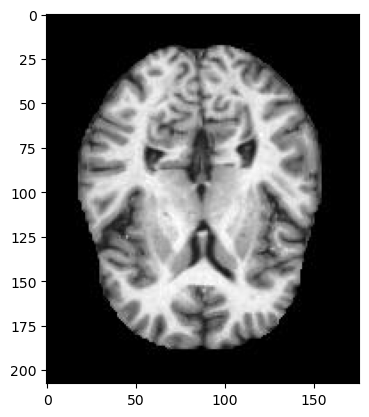

In [285]:
plt.imshow(df_bin_train.iloc[0,0],cmap='gray')
print(f'Classification (0= NoDementia, 1= Dementia): {df_bin_train.iloc[0,1]}')

# Binary Classification CNN

#### A. Build model

In [286]:
bin_model = models.Sequential()
bin_model.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(208,176,1)))
bin_model.add(layers.MaxPooling2D((2,2)))
bin_model.add(layers.Conv2D(64, (3,3), activation='relu'))
bin_model.add(layers.MaxPooling2D((2,2)))
bin_model.add(layers.Conv2D(63, (3,3), activation ='relu'))

In [287]:
bin_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 103, 87, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_16 (Conv2D)          (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_11 (MaxPoolin  (None, 50, 42, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 48, 40, 63)        36351     
                                                                 
Total params: 55,167
Trainable params: 55,167
Non-trai

In [288]:
bin_model.add(layers.Flatten())
bin_model.add(layers.Dense(1, activation = 'sigmoid'))

#### B. Compile model

In [289]:
bin_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [290]:
utils.plot_model(bin_model, rankdir="LR", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


#### C.  Fit model

- Here I changed the elements of the data structure from an array of arrays to a tensor input. First I removed the outer array putting the inner arrays into a list, then converted that list of arrays to a tensor

In [5]:
bin_train_img = df_bin_train[0].values.tolist()

In [6]:
bin_train_img = tf.convert_to_tensor(bin_train_img)

2022-10-20 08:27:58.926237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [317]:
bin_train_img.shape

TensorShape([10243, 208, 176])

In [7]:
bin_train_label = df_bin_train[1].values

In [8]:
bin_train_label.shape

(10243,)

In [300]:
bin_history = bin_model.fit(
    bin_train_img, bin_train_label, epochs=10, 
    validation_split=0.20
)

Epoch 1/10
257/257 [==============================] - 143s 555ms/step - loss: 1.7784 - accuracy: 0.5421 - val_loss: 0.6399 - val_accuracy: 0.6008
Epoch 2/10
257/257 [==============================] - 144s 559ms/step - loss: 0.6272 - accuracy: 0.6103 - val_loss: 0.6092 - val_accuracy: 0.6071
Epoch 3/10
257/257 [==============================] - 145s 564ms/step - loss: 0.5955 - accuracy: 0.6275 - val_loss: 0.5579 - val_accuracy: 0.6510
Epoch 4/10
257/257 [==============================] - 150s 583ms/step - loss: 0.5599 - accuracy: 0.6549 - val_loss: 0.5498 - val_accuracy: 0.6559
Epoch 5/10
257/257 [==============================] - 147s 572ms/step - loss: 0.5156 - accuracy: 0.6856 - val_loss: 0.5514 - val_accuracy: 0.6530
Epoch 6/10
257/257 [==============================] - 153s 595ms/step - loss: 0.4762 - accuracy: 0.6986 - val_loss: 0.5318 - val_accuracy: 0.6837
Epoch 7/10
257/257 [==============================] - 168s 654ms/step - loss: 0.4745 - accuracy: 0.7042 - val_loss: 0.5441 -

### Model Evaluation

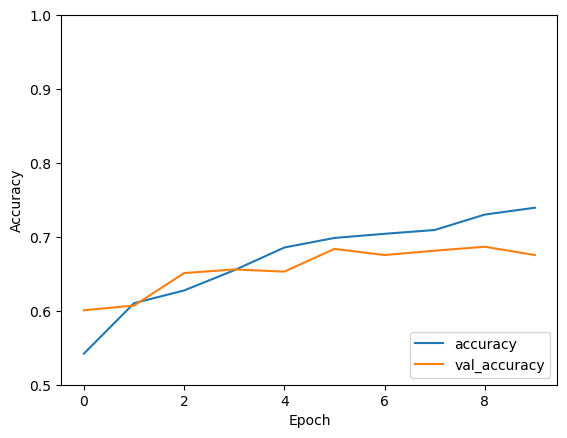

In [301]:
plt.plot(bin_history.history['accuracy'], label='accuracy')
plt.plot(bin_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [17]:
bin_test_img = df_bin_test[0].values.tolist()
bin_test_img = tf.convert_to_tensor(bin_test_img)
bin_test_img.shape

TensorShape([1279, 208, 176])

In [18]:
bin_test_label = df_bin_test[1].values
bin_test_label.shape

(1279,)

In [305]:
test_loss, test_acc = bin_model.evaluate(bin_test_img,  bin_test_label, verbose=2)

40/40 - 5s - loss: 0.8607 - accuracy: 0.6364 - 5s/epoch - 122ms/step


In [306]:
print(test_acc)

0.6364347338676453


#### Summary:

The current model is only 63% accurate. Layers, inputs, and dropouts will be adjusted in the next iteration.
    

## Binary Classification Tuning

#### A. Added Dropout, changed layer inputs

In [10]:
bin_model2 = models.Sequential()

bin_model2.add(layers.Conv2D(32, kernel_size=3, activation='relu', input_shape=(208,176,1)))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Conv2D(64, (3,3), activation='relu'))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Conv2D(128, (3,3), activation ='relu'))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Conv2D(128, (3,3), activation ='relu'))
bin_model2.add(layers.MaxPooling2D((2,2)))

bin_model2.add(layers.Dropout(0.5))
bin_model2.add(layers.Flatten())
bin_model2.add(layers.Dense(512, activation = 'relu'))
bin_model2.add(layers.Dense(1, activation = 'sigmoid'))

In [11]:
bin_model2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 206, 174, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 103, 87, 32)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 101, 85, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 50, 42, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 48, 40, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 24, 20, 128)      0

In [324]:
bin_model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [326]:
bin2_history = bin_model2.fit(
    bin_train_img, bin_train_label, epochs=20, 
    validation_split=0.20, batch_size=256
)

Epoch 1/20
33/33 [==============================] - 144s 4s/step - loss: 0.6989 - accuracy: 0.5243 - val_loss: 0.6755 - val_accuracy: 0.5442
Epoch 2/20
33/33 [==============================] - 146s 4s/step - loss: 0.6733 - accuracy: 0.5680 - val_loss: 0.6974 - val_accuracy: 0.5149
Epoch 3/20
33/33 [==============================] - 132s 4s/step - loss: 0.6948 - accuracy: 0.5192 - val_loss: 0.6870 - val_accuracy: 0.5456
Epoch 4/20
33/33 [==============================] - 131s 4s/step - loss: 0.6801 - accuracy: 0.5483 - val_loss: 1.0177 - val_accuracy: 0.4963
Epoch 5/20
33/33 [==============================] - 128s 4s/step - loss: 0.7026 - accuracy: 0.5552 - val_loss: 0.7269 - val_accuracy: 0.4983
Epoch 6/20
33/33 [==============================] - 130s 4s/step - loss: 0.6786 - accuracy: 0.5602 - val_loss: 0.6520 - val_accuracy: 0.5896
Epoch 7/20
33/33 [==============================] - 150s 5s/step - loss: 0.6690 - accuracy: 0.5686 - val_loss: 0.6641 - val_accuracy: 0.5769
Epoch 8/20
33

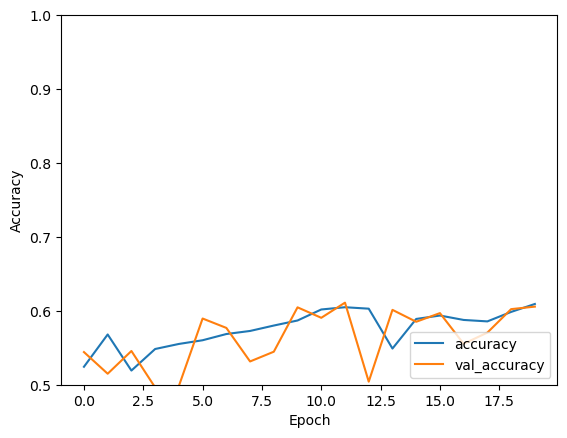

In [327]:
plt.plot(bin2_history.history['accuracy'], label='accuracy')
plt.plot(bin2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

#### B. Changed learning rate, increased epochs

In [9]:
opt = tf.keras.optimizers.Adam(learning_rate=3e-4)

In [12]:
bin_model2.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])

In [13]:
bin2_history = bin_model2.fit(
    bin_train_img, bin_train_label, epochs=50, 
    validation_split=0.20, batch_size=256
)

Epoch 1/50
33/33 [==============================] - 131s 4s/step - loss: 6.9821 - accuracy: 0.5146 - val_loss: 0.6808 - val_accuracy: 0.5774
Epoch 2/50
33/33 [==============================] - 127s 4s/step - loss: 0.6774 - accuracy: 0.5613 - val_loss: 0.6744 - val_accuracy: 0.5588
Epoch 3/50
33/33 [==============================] - 129s 4s/step - loss: 0.6776 - accuracy: 0.5580 - val_loss: 0.6701 - val_accuracy: 0.5969
Epoch 4/50
33/33 [==============================] - 125s 4s/step - loss: 0.6614 - accuracy: 0.5875 - val_loss: 0.6440 - val_accuracy: 0.6047
Epoch 5/50
33/33 [==============================] - 133s 4s/step - loss: 0.6492 - accuracy: 0.5948 - val_loss: 0.6981 - val_accuracy: 0.5461
Epoch 6/50
33/33 [==============================] - 132s 4s/step - loss: 0.6536 - accuracy: 0.5886 - val_loss: 0.9482 - val_accuracy: 0.4998
Epoch 7/50
33/33 [==============================] - 132s 4s/step - loss: 0.6733 - accuracy: 0.5768 - val_loss: 0.6721 - val_accuracy: 0.5720
Epoch 8/50
33

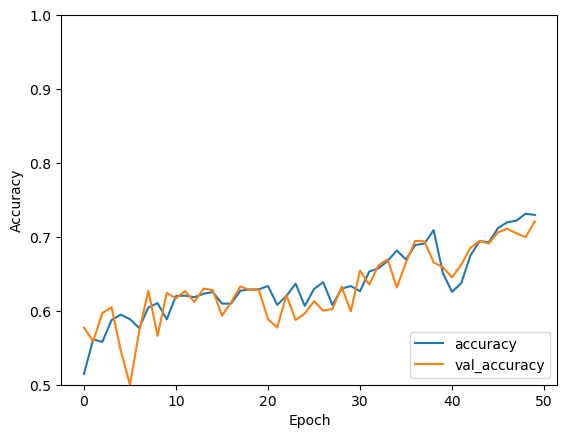

In [14]:
plt.plot(bin2_history.history['accuracy'], label='accuracy')
plt.plot(bin2_history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')

In [19]:
test_loss, test_acc = bin_model2.evaluate(bin_test_img,  bin_test_label, verbose=2)

40/40 - 6s - loss: 0.6186 - accuracy: 0.7349 - 6s/epoch - 158ms/step


In [20]:
print(test_acc)

0.7349491715431213


In [21]:
print(bin2_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


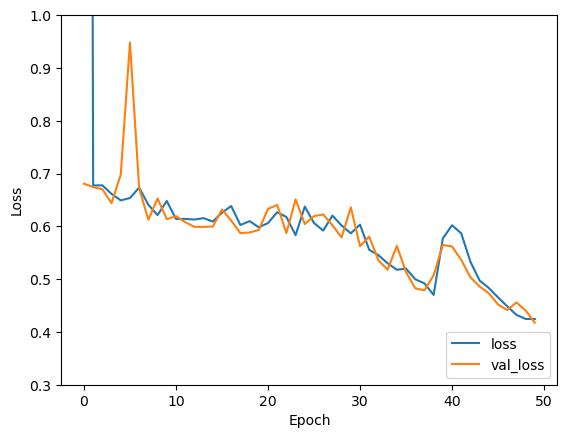

In [23]:
plt.plot(bin2_history.history['loss'], label='loss')
plt.plot(bin2_history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0.3, 1])
plt.legend(loc='lower right')

### Summary: 

The model should be trained for futher epochs since the model is performing similarly well on both the training and validation set, the accuracy hasn't plateaued, the loss has yet to consistently depart. To put this simply, the model hasn't overfit and the accuracy is still increasing.  

#### C. Increased epochs

In [ ]:
bin2_history = bin_model2.fit(
    bin_train_img, bin_train_label, epochs=100, 
    validation_split=0.20, batch_size=256
)